<a href="https://colab.research.google.com/github/nathalylorena/Data-mining/blob/main/datamining_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

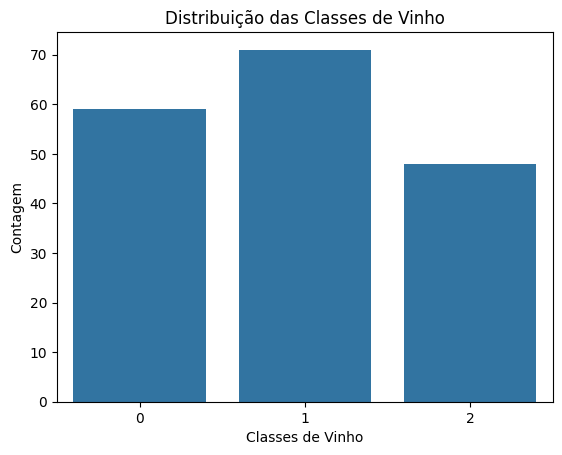

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_wine

# Importando o conjunto de dados Wine
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

# Exibindo as primeiras linhas do conjunto de dados
print(df_wine.head())

# Informações básicas sobre o conjunto de dados
print(df_wine.info())

# Estatísticas descritivas
print(df_wine.describe())

# Distribuição das classes de vinho
sns.countplot(x='target', data=df_wine)
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classes de Vinho')
plt.ylabel('Contagem')
plt.show()

# Pairplot para visualizar relações entre algumas características
sns.pairplot(df_wine, hue='target')
plt.show()

# Heatmap da matriz de correlação
corr_matrix = df_wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# Boxplot para visualizar a distribuição de características por classe de vinho
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='alcohol', data=df_wine)
plt.title('Teor Alcoólico por Classe de Vinho')
plt.xlabel('Classes de Vinho')
plt.ylabel('Teor Alcoólico')
plt.show()

# Seleção de variáveis independentes (X) e dependente (y)
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Divisão dos dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão logística
modelo = LogisticRegression(max_iter=200)
modelo.fit(X_treino, y_treino)

# Previsões no conjunto de teste
y_pred = modelo.predict(X_teste)

# Avaliação
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia}')

# Matriz de confusão
matriz_confusao = confusion_matrix(y_teste, y_pred)
print('Matriz de Confusão:')
print(matriz_confusao)

# Relatório de classificação
relatorio_classificacao = classification_report(y_teste, y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)